In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

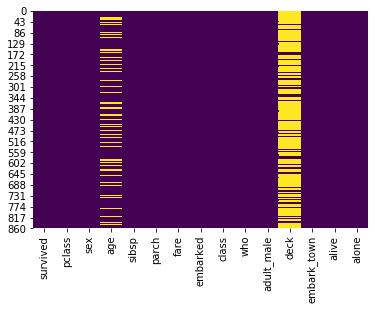

In [7]:
sns.heatmap(titanic.isnull(), cbar = False,cmap = 'viridis')

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

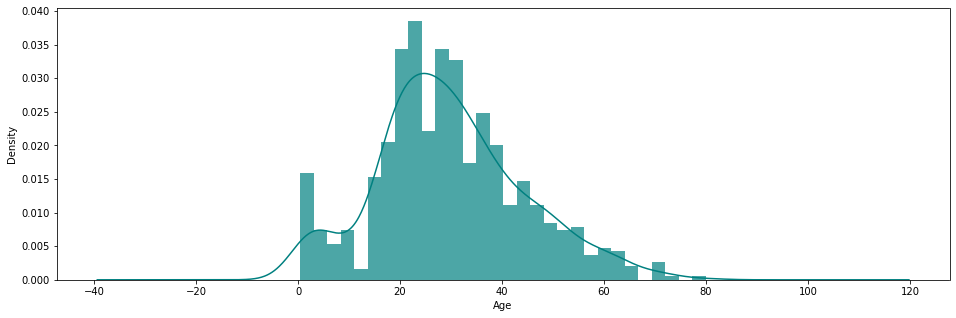

In [9]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True,color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

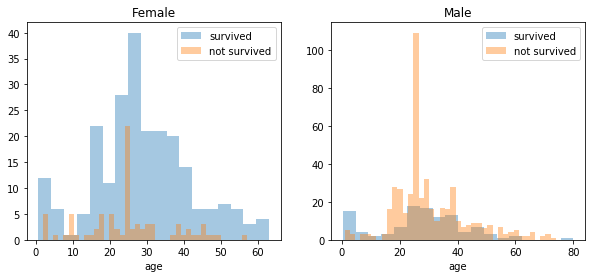

In [324]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']


ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Text(0.5, 1.0, 'male')

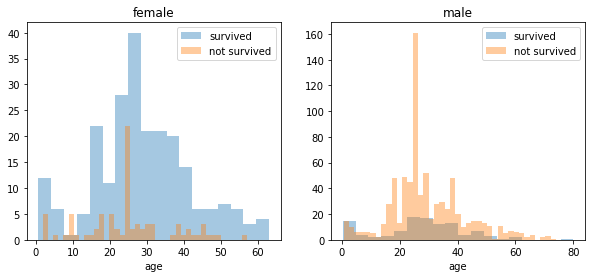

In [354]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

women = sns.distplot(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==1)]['age'].dropna(),label='survived',bins=18,ax=axes[0],kde=False)
women = sns.distplot(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==0)]['age'].dropna(),label='not survived',bins=40,ax=axes[0],kde=False)
women.legend()
women.set_title('female')

men = sns.distplot(titanic.loc[(titanic['sex']=='male') & titanic['survived']==1]['age'].dropna(),label='survived',bins=18,ax=axes[1],kde=False)
men = sns.distplot(titanic.loc[(titanic['sex']=='male') & titanic['survived']==0]['age'].dropna(),label='not survived',bins=40,ax=axes[1],kde=False)
men.legend()
men.set_title('male')

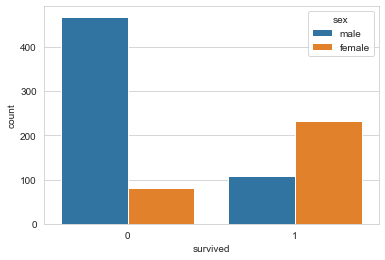

In [28]:
sns.set_style("whitegrid")
sns.countplot(x='survived',hue = titanic.sex, data=titanic)

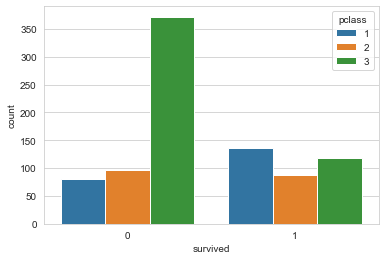

In [41]:
sns.countplot(x='survived',hue = titanic.pclass, data= titanic)

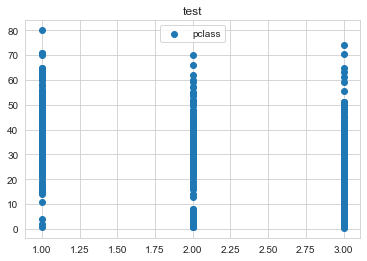

In [369]:
test = plt.scatter(x='pclass',y='age',data=titanic,label='pclass')
plt.title('test')
plt.legend(loc='upper center')


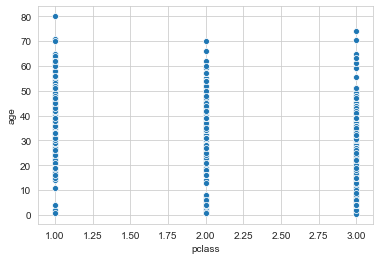

In [305]:
sns.scatterplot(x='pclass',y='age',data=titanic)

In [229]:
a = titanic.loc[titanic['pclass']==1]['age'].mean()
b = titanic.loc[titanic['pclass']==2]['age'].mean()
c = titanic.loc[titanic['pclass']==3]['age'].mean()
names = [a,b,c]

In [225]:
unique = titanic.pclass.unique()

<BarContainer object of 3 artists>

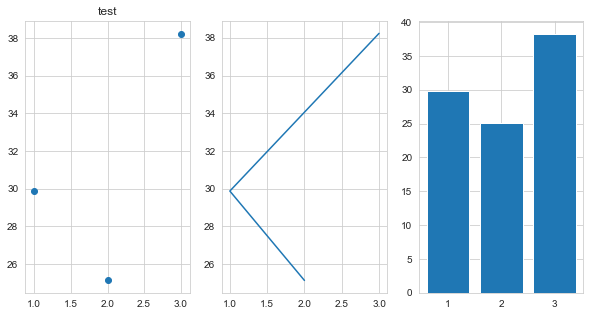

In [302]:
plt.figure(figsize=(10,5))
plt.subplot(131)
test = plt.scatter(x=unique,y=names)
plt.title('test')
plt.subplot(132)
plt.plot(unique,names)
plt.subplot(133)
plt.bar(unique,names)

Text(0.5, 0, 'female')

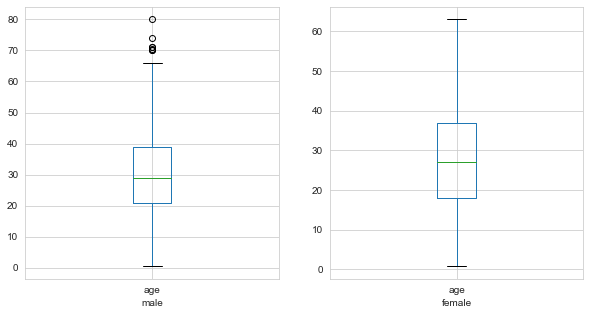

In [244]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
titanic_male = titanic.loc[titanic['sex']=='male']['age'].dropna().plot(kind='box',ax=axes[0])
titanic_male.set_xlabel('male')
titanic_female = titanic.loc[titanic['sex']=='female']['age'].dropna().plot(kind='box',ax=axes[1])
titanic_female.set_xlabel('female')

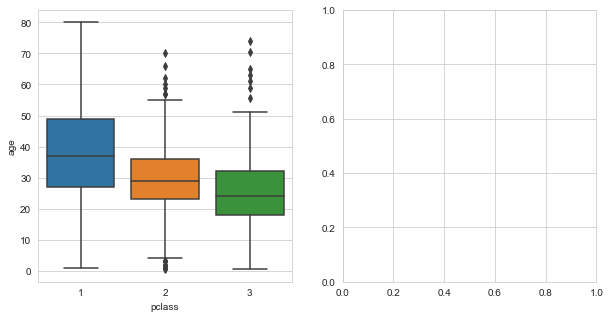

In [180]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
sns.boxplot(x='pclass',y='age',data=titanic,ax=axes[0])

In [12]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

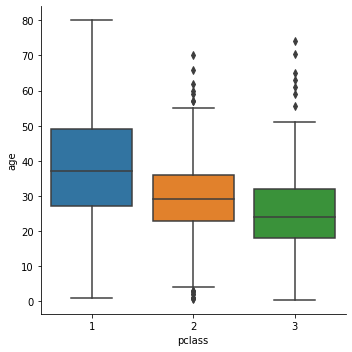

In [13]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

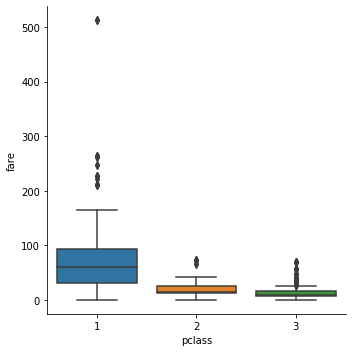

In [14]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')

In [15]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [16]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [17]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [18]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [19]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)

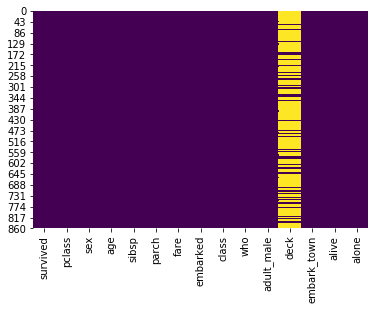

In [20]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [21]:
#Analysing Embarked

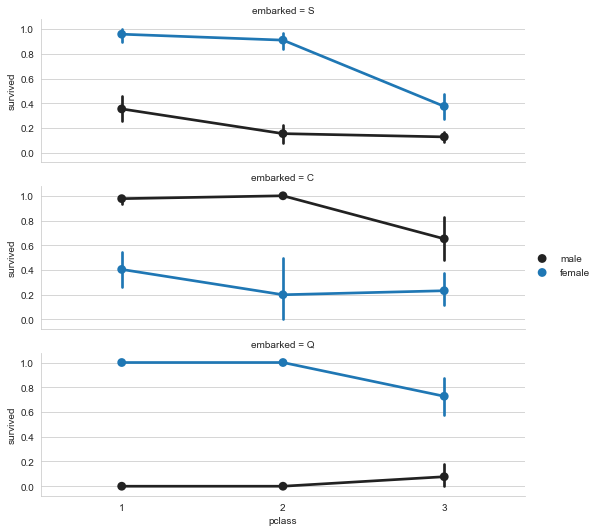

In [312]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [23]:
titanic['embarked'].isnull().sum()

2

In [24]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [25]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [26]:
titanic['embarked'].isnull().sum()

0

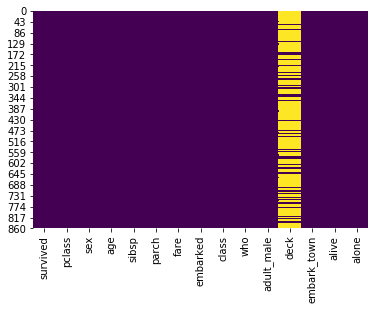

In [27]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [28]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

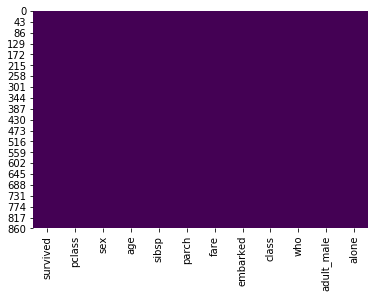

In [29]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           891 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [32]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [33]:
#convert categorical data into numerical data

In [34]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

In [35]:
who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

In [36]:
adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [37]:
alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)

In [38]:
ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,NaN,0,0
2,1,3,1,26,0,0,7,0,Third,NaN,0,1
3,1,1,1,35,1,0,53,0,First,NaN,0,0
4,0,3,0,35,0,0,8,0,Third,0.0,1,1


In [40]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [42]:
#Build Logistic Regression Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [45]:
X_train.shape

(596, 9)

In [46]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [47]:
model.score(X_test, y_test)

0.8271186440677966

In [48]:
#Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE

In [50]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [51]:
X.shape

(891, 9)

In [52]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [53]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [54]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [55]:
XX = X[X.columns[rfe.support_]]

In [56]:
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [58]:
X_train.shape

(712, 5)

In [59]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [60]:
model.score(X_test, y_test)

0.8547486033519553

In [61]:
#Accuracy, F1-Score, P, R, AUC_ROC curve

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [69]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [74]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [75]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [66]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
log loss:  0.3659737372713988
auc:  0.9007246376811595


In [144]:
idx = np.min(np.where(tpr>0.95))
idx

27

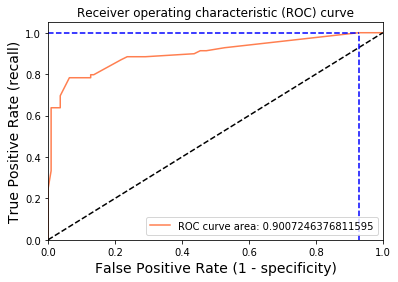

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [145]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [29]:
titanic = sb.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

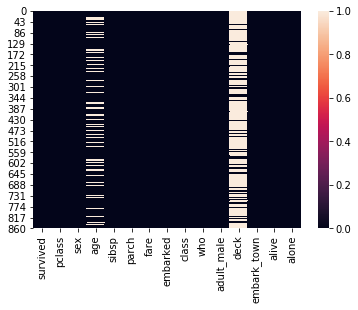

In [41]:
sb.heatmap(titanic.isnull())

In [48]:
(titanic['age'].isnull().sum()/titanic.shape[0])*100

19.865319865319865

In [87]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic.loc[titanic['pclass']==1]['age'].mean()
        
        elif pclass == 2:
            return titanic.loc[titanic['pclass']==2]['age'].mean() 
        
        elif pclass == 3:
            return titanic.loc[titanic['pclass']==3]['age'].mean()
        
    else:
        return(age)

In [88]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

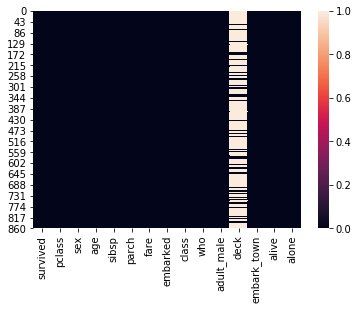

In [89]:
sb.heatmap(titanic.isnull())

In [94]:
titanic.drop(['deck','embark_town','alive'],axis=1,inplace=True)

In [110]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [129]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [136]:
mode = 'S'

In [140]:
titanic['embarked'].fillna(mode,inplace=True)

In [164]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [169]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [175]:
titanic.loc[titanic['pclass']==1]['age'].mean()

38.23344086021506

In [181]:
titanic.head(5) 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


Text(0.5, 1.0, 'f')

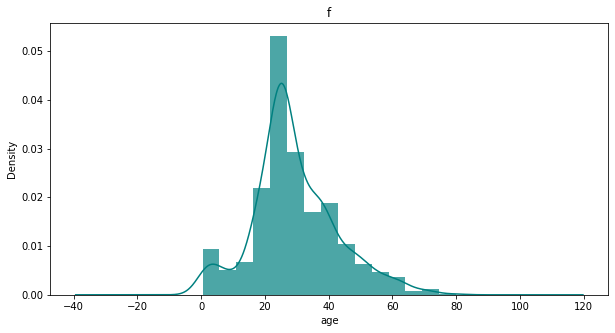

In [487]:
ax=titanic['age'].hist(density = True,color='teal',alpha=0.7,figsize=(10,5),bins=15,stacked=True)
ax=titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('age')
ax.set_title('f')

Text(0.5, 1.0, 'male')

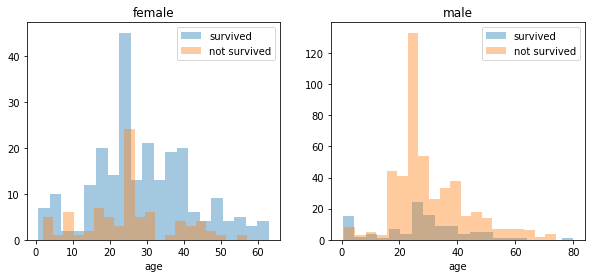

In [376]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax=sb.distplot(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==1)]['age'],ax=axes[0],kde=False,bins=20,label='survived')
ax=sb.distplot(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==0)]['age'],ax=axes[0],kde=False,bins=20,label='not survived')
ax.legend()
ax.set_title('female')

ax=sb.distplot(titanic.loc[(titanic['sex']=='male') & (titanic['survived']==1)]['age'],ax=axes[1],kde=False,bins=20,label='survived')
ax=sb.distplot(titanic.loc[(titanic['sex']=='male') & (titanic['survived']==0)]['age'],ax=axes[1],kde=False,bins=20,label='not survived')
ax.legend()
ax.set_title('male')

In [419]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [423]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [425]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

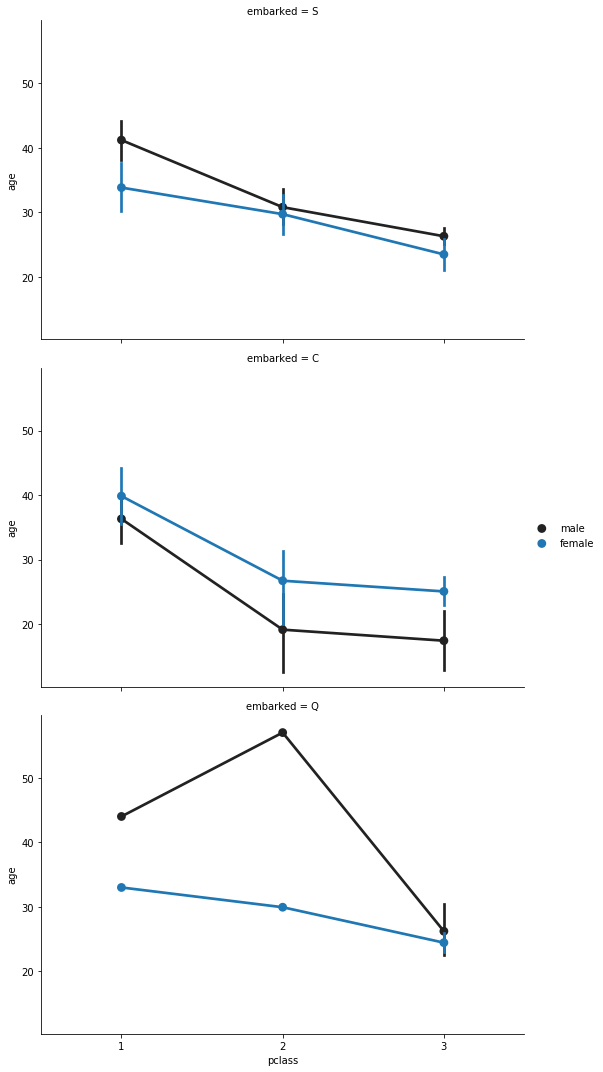

In [449]:
f = sb.FacetGrid(titanic,row='embarked',height=5,aspect=1.5)
f.map(sb.pointplot,'pclass','age','sex',hue_order=None,order=None)
f.add_legend()

In [448]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


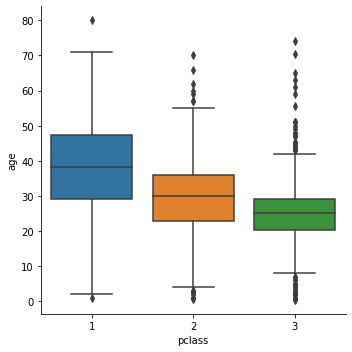

In [476]:
sb.catplot(x='pclass',y='age',data=titanic,kind='box')

In [478]:
titanic.loc[titanic['pclass']==1]['age'].mean()

38.23344086021506

In [479]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [480]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = LogisticRegression()

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(titanic.drop('survived'),titanic['survived'],testsize=0.2,randomstate=4)

In [ ]:
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [ ]:
from sklearn.confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sb.heatmap(cm)

In [34]:
X=np.array([[1,0],[0,1]])
Y=np.array([[2,2],[2,2]])
Z=np.dot(X,Y)
X

array([[1, 0],
       [0, 1]])

In [39]:
Y

array([[2, 2],
       [2, 2]])